## Variables discretas

**Variable aleatoria** $X: S\to R$, del  espacio muestral a la recta real (como dominio de la función de probabilidad).

**Función de probabilidad** $P(x): R\to [0, 1]$, de la recta real al valor de la probabilidad. 

El Valor esperado es $E(X) = \sum_i p_ix_i$

In [24]:
from scipy.stats import expon
from scipy.integrate import quad
from scipy.integrate import dblquad
import numpy as np


In [25]:
# Calculo del valor esperado de variables discreta
# entrada
x = [1, 2, 3, 4, 5]
p = [0.2, 0.2, 0.2, 0.2, 0.2]

# Cal
exp = 0
for i, j in zip(x, p):
    exp += i * j

# Output
print('Valor esperado: {}'.format(exp))

Valor esperado: 3.0


## Variable contínua

El valor esperado es en variables aleatorias contínuas viene dado por
  $E(X) = \int_{-\infty}^{\infty}xf(x)dx$

In [72]:
# Input
func = lambda x: 1.5 - 6 * (x - 50) ** 2
domain = (49.5, 50.5)

# Cal
cumulation = quad(func, domain[0], domain[1])

# Output
print('Acumulación a partir de {} a {}: {:.6f}'.format(domain[0], domain[1], cumulation[0]))

# Input
func = lambda x: x * (2/11)
domain = (5, 6)

# Cal
def exp_func(x):
    return x * func(x)
exp = quad(exp_func, domain[0], domain[1])

# Output
print('Valor esperado: {:.6f}'.format(exp[0]))

Acumulación a partir de 49.5 a 50.5: 1.000000
Valor esperado: 5.515152


## Valor esperado y Varianza de variables aleatorias

La varianza de variables aleatorias se define como

$$Var(X) = E(X-E(X))^2 = E(X^2) - E(X)^2$$

In [27]:
# Calculo de la varianza para variables discretas

# Input
x = [1, 2, 3, 4, 5]
p = [0.2, 0.2, 0.2, 0.2, 0.2]

# Cal
exp = 0
exp2 = 0
for i, j in zip(x, p):
    exp += i * j
    exp2 += i * i * j
var = exp2 - exp ** 2

# Output
print('Varianza: {:.4f}'.format(var))
print('Desviación estándard: {:.4f}'.format(var ** (1/2)))

Varianza: 2.0000
Desviación estándard: 1.4142


In [28]:
# Calculo de la varianza para variables continuas

# Input
func = lambda x: (2/11) * x
domain = (5, 6)

# Cal
def exp_func(x):
    return x * func(x)
def exp_func2(x):
    return x * x * func(x)
exp = quad(exp_func, domain[0], domain[1])
exp2 = quad(exp_func2, domain[0], domain[1])
var = exp2[0] - exp[0] ** 2

# Output
print('Varianza: {:.4f}'.format(var))
print('Desviación estándard: {:.4f}'.format(var ** (1/2)))

Varianza: 0.0831
Desviación estándard: 0.2883


## Distribuciones de probabilidad

In [73]:
from scipy import stats

Una lista completa con las distribuciones continuas disponibles en el submódulo se encuentran en este [link](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions). Ejemplos de estas son:

* Normal($\mu=5$, $\sigma=2$): ``stats.norm(loc=5, scale=2)``
* Gamma($\alpha=9$, $\beta=2$): ``stats.gamma(a=9, scale=(1/2))``

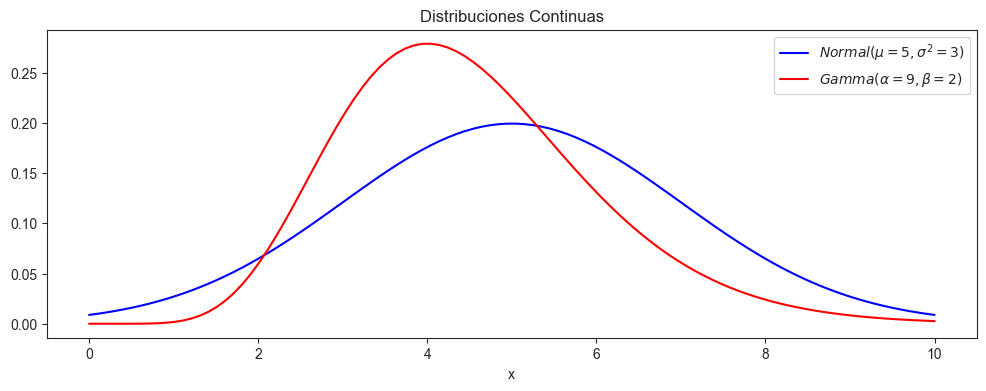

In [74]:
# Instanciar Distribuciones
N = stats.norm(loc=5, scale=2) # distribución normal
Ga = stats.gamma(a=9, scale=0.5) # distribución Gamma

# Generar figura
plt.figure(figsize=(12,4))

# Generar puntos
x = np.linspace(0,10, 100)

# Generar probabilidades para Normal y Gamma
plt.plot(x, N.pdf(x), "b", label="$Normal(\\mu=5, \\sigma^2=3)$")
plt.plot(x, Ga.pdf(x),"r", label="$Gamma(\\alpha=9, \\beta=2)$")

# Agregar estilo
plt.title("Distribuciones Continuas")
plt.xlabel("x")
plt.legend()
plt.show()

Una lista completa con las distribuciones discretas disponibles en el submódulo se encuentran en este [link](https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions). Ejemplos de estas son:

* Bernoulli($p=0.3$): ``stats.bernoulli(p=0.3)``
* Poisson($\lambda=4$): ``stats.poisson(mu=4)``

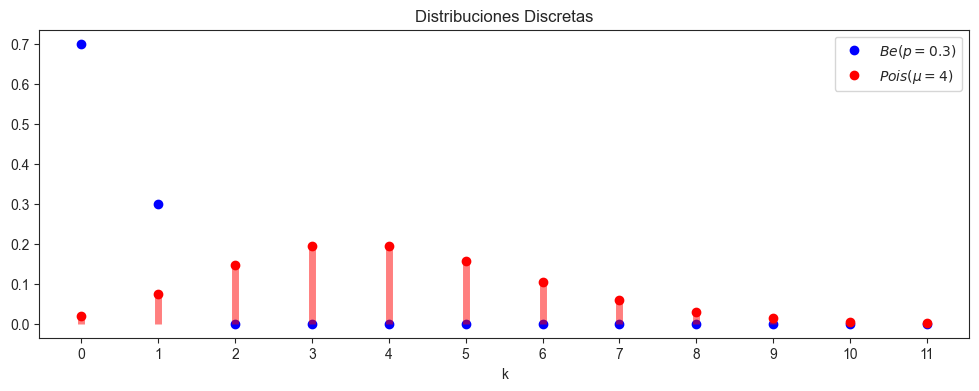

In [31]:
# Instanciar Distribuciones
Be = stats.bernoulli(p=0.3) # distribución de Bernoulli
Pois = stats.poisson(mu=4)  # distribución de Poisson

# Generar figura
plt.figure(figsize=(12,4))

# Generar puntos 
k = np.arange(12)

# Generar probabilidades para Bernoulli
Be1 = Be.pmf(k)
plt.plot(k, Be1, "bo", label="$Be(p=0.3)$")
#plt.vlines(x, 0, Be1, colors='b', lw=5, alpha=0.5)

# Generar probabilidades para Poisson
plt.plot(k, Pois.pmf(k), "ro", label="$Pois(\\mu=4)$")
plt.vlines(k, 0, Pois.pmf(k), colors='r', lw=5, alpha=0.5)

# Agregar estilo
plt.title("Distribuciones Discretas")
plt.xlabel("k")
plt.xticks(k)
plt.legend()
plt.show();

El módulo cuenta además otro tipo de distribuciones no paramétricas que generan una distribución a partir de una muestra empirica, a partir de datos.

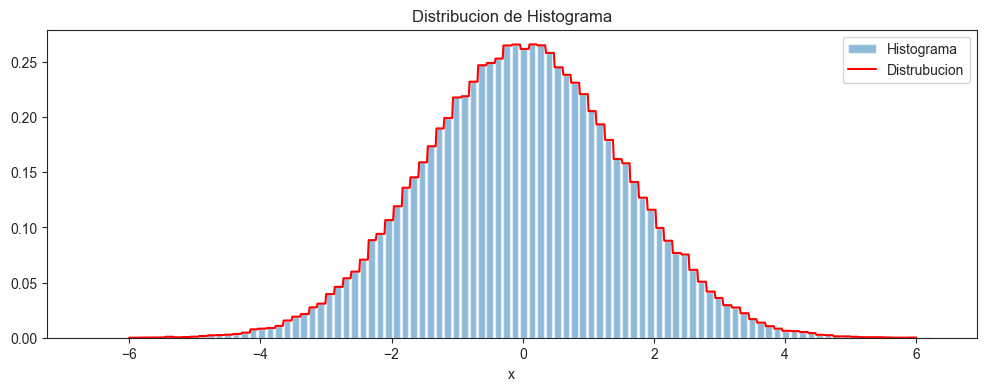

In [75]:
# Generar datos
data = stats.norm.rvs(size=100000, loc=0, scale=1.5, random_state=123)

# Generar histogramas
bins = 100
hist = np.histogram(data, bins=bins)

# Generar distribucion
hist_dist = stats.rv_histogram(hist)

# Generar figura
plt.figure(figsize=(12,4))

# Graficar histograma
plt.hist(data, density=True, bins=bins, alpha=0.5,label="Histograma", width=0.1);

# Generar probabilidades
x = np.linspace(-6, 6, 1000)
plt.plot(x, hist_dist.pdf(x), "r-", label="Distrubucion")

# Agregar estilo
plt.legend()
plt.title("Distribucion de Histograma")
plt.xlabel("x")
plt.show();

### Función de masa de probabilidad

Otra forma de representar las distribuciones ___discretas___ es utilizando su Función de masa de probabilidad que relaciona cada valor con su probabilidad

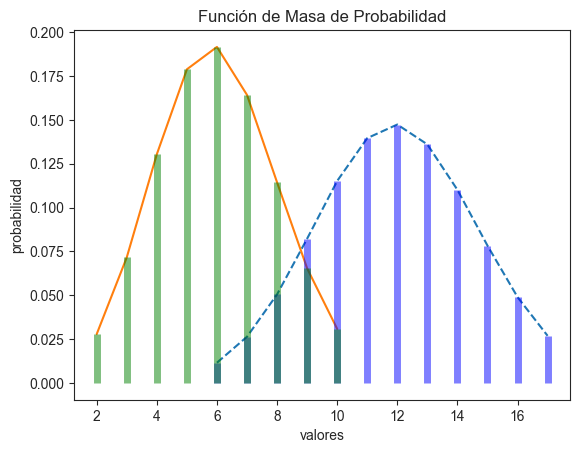

In [33]:
n, p = 30, 0.4 # parametros de forma de la distribución binomial
n_1, p_1 = 20, 0.3 # parametros de forma de la distribución binomial
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))
x_1 = np.arange(stats.binom.ppf(0.01, n_1, p_1),
              stats.binom.ppf(0.99, n_1, p_1))
fmp = stats.binom.pmf(x, n, p) # Función de Masa de Probabilidad
fmp_1 = stats.binom.pmf(x_1, n_1, p_1) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.plot(x_1, fmp_1)
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.vlines(x_1, 0, fmp_1, colors='g', lw=5, alpha=0.5)
plt.title('Función de Masa de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

### Función de distribucion acumulada

Si queremos evitar los problemas que se generan con la función de densidad cuando el número de valores es muy grande, podemos recurrir a utilizar la Función de Distribución Acumulada, para representar las distribuciones, tanto discretas como continuas. Esta función relaciona los valores con su correspondiente percentil; es decir que va a describir la probabilidad de que una variable aleatoria X sujeta a cierta ley de distribución de probabilidad se sitúe en la zona de valores menores o iguales a x.


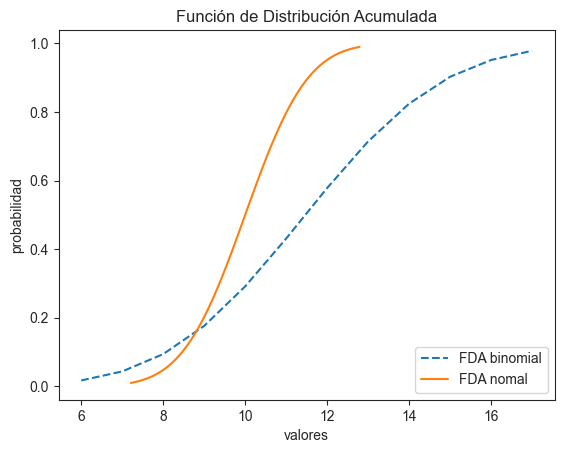

In [34]:
x_1 = np.linspace(stats.norm(10, 1.2).ppf(0.01),
                  stats.norm(10, 1.2).ppf(0.99), 100)
fda_binom = stats.binom.cdf(x, n, p) # Función de Distribución Acumulada
fda_normal = stats.norm(10, 1.2).cdf(x_1) # Función de Distribución Acumulada
plt.plot(x, fda_binom, '--', label='FDA binomial')
plt.plot(x_1, fda_normal, label='FDA nomal')
plt.title('Función de Distribución Acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=4)
plt.show()

### Función de densidad de probabilidad

Por último, el equivalente a la funcion de masa de probabilídad pero aplicada a distribuciones ___continuas___ es la Función de Densidad de Probabilidad. Esta función es la derivada de la Función de Distribución Acumulada. Por ejemplo, para la distribución normal que graficamos anteriormente, su FDP es la típica forma de campana que caracteriza a esta distribución.

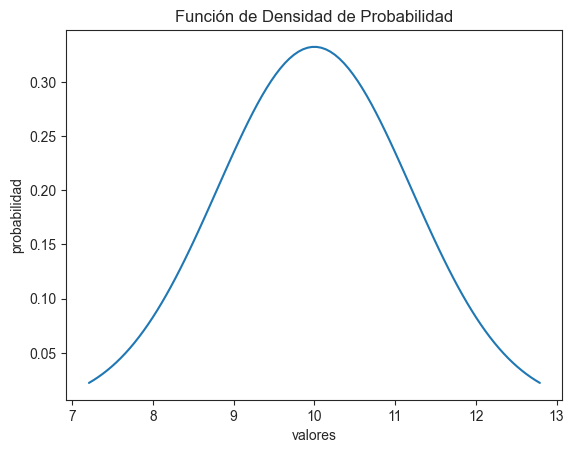

In [35]:
FDP_normal = stats.norm(10, 1.2).pdf(x_1) # FDP
plt.plot(x_1, FDP_normal, label='FDP nomal')
plt.title('Función de Densidad de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

## Distribución discretas

Ahora que ya se conoce como representar las distribuciones, vamos a analizar cada una de ellas con más detalle para conocer su forma, sus principales aplicaciones y sus propiedades. Se empezará por las distribuciones discretas.

### Distribución geometrica

La Distribución Geométrica esta dada por la formula:

$$p(r; p) = p(1-p)^{r-1}$$

En dónde $r\geq 1$ y el parámetro es la probabilidad. La Distribución Geométrica expresa la probabilidad de tener que esperar exactamente $r$ pruebas hasta encontrar el primer éxito si la probabilidad de éxito en una sola prueba es $p$. Por ejemplo, en un proceso de selección, podría definir el número de entrevistas que deberíamos realizar antes de encontrar al primer candidato aceptable.

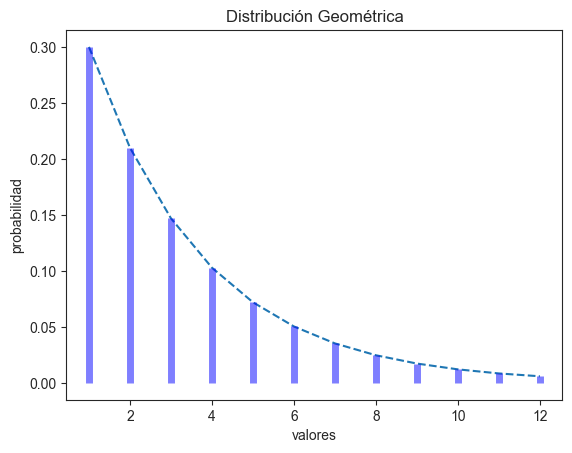

In [76]:
p =  0.3 # parametro de forma
geometrica = stats.geom(p) # Distribución
x = np.arange(geometrica.ppf(0.01),
              geometrica.ppf(0.99))
fmp = geometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Geométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

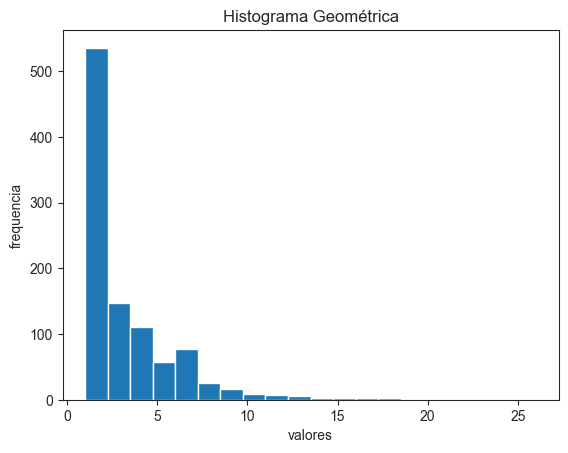

In [77]:
# histograma
aleatorios = geometrica.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Geométrica')
plt.show()

### Distribución Hipergeométrica

La Distribución Hipergeométrica esta dada por la formula:

$$p(r; n, N, M) = \frac{{M \choose r}{N-M \choose n-r}}{{N \choose n}}$$

En dónde el valor de $r$ esta limitado por $max(0, n-N+M)$ y $min(n, M)$ inclusive; y los parámetros $n$ ($1 \leq n\leq N)$, $N$ ($N \geq 1$) y $M$ ($M \geq 1$) son todos números enteros. La Distribución Hipergeométrica describe experimentos en donde se seleccionan los elementos al azar sin reemplazo (se evita seleccionar el mismo elemento más de una vez). Más precisamente, supongamos que tenemos $N$ elementos de los cuales $M$ tienen un cierto atributo (y $N-M$ no tiene). Si escogemos $n$ elementos al azar sin reemplazo, $p(r)$ es la probabilidad de que exactamente $r$ de los elementos seleccionados provienen del grupo con el atributo.

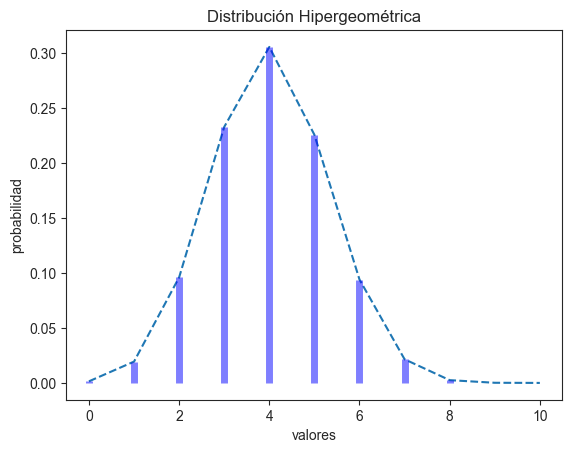

In [78]:
M, n, N = 30, 10, 12 # parametros de forma
hipergeometrica = stats.hypergeom(M, n, N) # Distribución
x = np.arange(0, n+1)
fmp = hipergeometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Hipergeométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

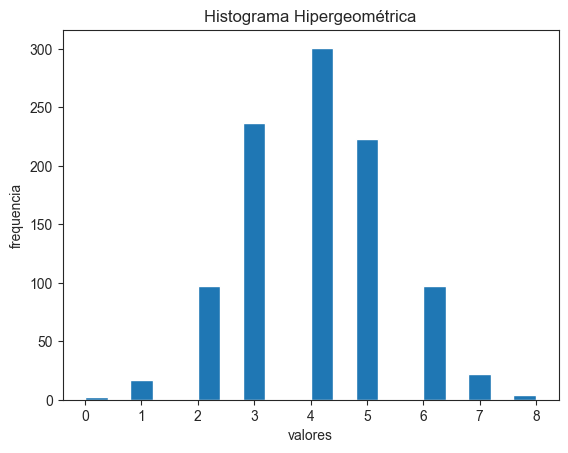

In [79]:
# histograma
aleatorios = hipergeometrica.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Hipergeométrica')
plt.show()

### Distribución de Bernoulli

La Distribución de Bernoulli esta dada por la formula:

$$p(r; p) = \left\{ \begin{array}{lr} 1-p = q & \text{  si  } r= 0 \text{  (fracaso)} \\ p & \text{  si  } r = 1 \text{  (éxito)} \end{array} \right. $$

En dónde el parámetro $p$ es la probabilidad de éxito en un solo ensayo, la probabilidad de fracaso por lo tanto va a ser $1-p$ (muchas veces expresada como $q$). Tanto $p$ como $q$ son probabilidades luego están limitaaos al intervalo de cero a uno. La Distribución de Bernoulli describe un experimento probabilístico en donde el ensayo tiene dos posibles resultados, éxito o fracaso. Desde esta distribución se pueden deducir varias Funciones de Densidad de Probabilidad de otras distribuciones que se basen en una serie de ensayos independientes.

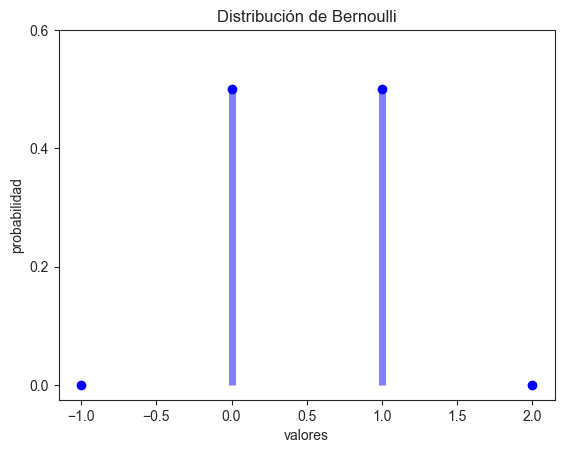

In [80]:
p =  0.5 # parametro de forma
bernoulli = stats.bernoulli(p)
x = np.arange(-1, 3)
fmp = bernoulli.pmf(x) # Función de Masa de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fmp, 'bo')
ax.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6])
plt.title('Distribución de Bernoulli')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

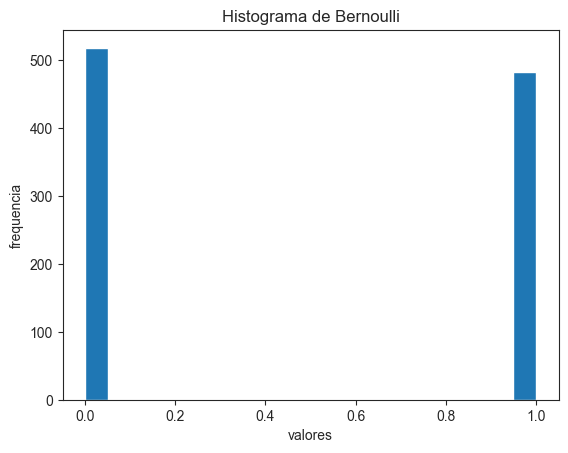

In [81]:
# histograma
aleatorios = bernoulli.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma de Bernoulli')
plt.show()

### Distribución Binomial 

La Distribución Binomial esta dada por la formula:

$$p(r; N, p) = {N \choose r} p^{r}(1-p)^{N-r}$$

En dónde $r$ con la condición $0 \leq r \leq N$ y el parámetro $N \geq 0$ son enteros; el parámetro $p$ es la probabilidad. La Distribución Binomial describe la probabilidad de exactamente $r$ éxitos en $N$ pruebas si la probabilidad de éxito en una sola prueba es $p$.


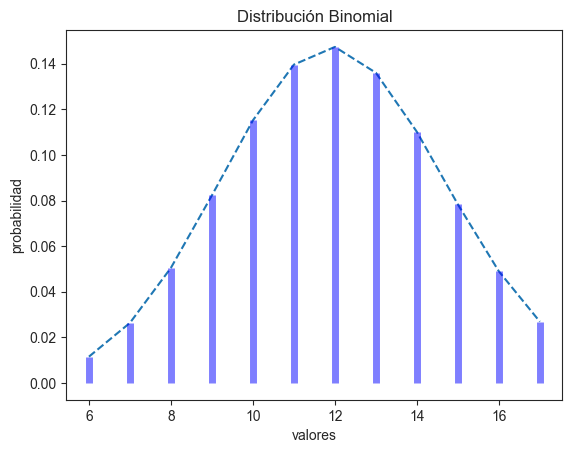

In [42]:
N, p = 30, 0.4 # parametros de forma
binomial = stats.binom(N, p) # Distribución
x = np.arange(binomial.ppf(0.01),
              binomial.ppf(0.99))
fmp = binomial.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

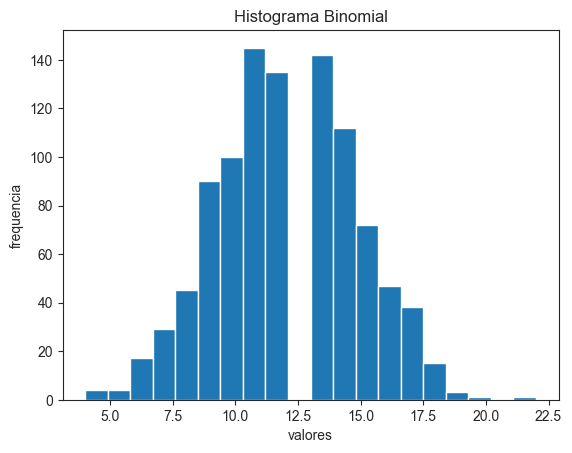

In [43]:
# histograma
aleatorios = binomial.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Binomial')
plt.show()

#### Ejemplo

Sea una moneda equilibrada, es decir la probabilidad de salir cada uno de los lados es 0.5

In [44]:
n = 5
n_experiments = 1000
heads_count = np.random.binomial(n, 0.5, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

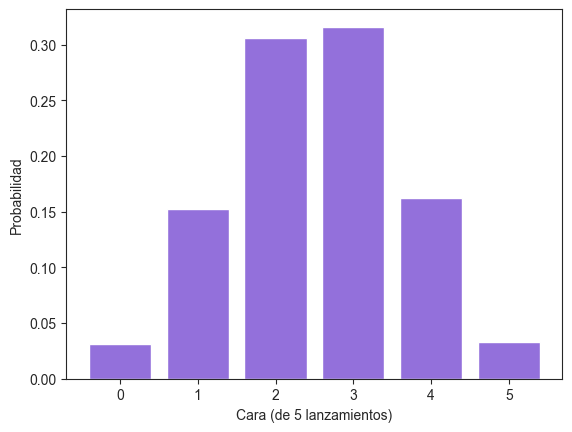

In [45]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Cara (de 5 lanzamientos)')
_ = plt.ylabel('Probabilidad')

Ahora tenemos una moneda con pesos cuya probabilidad p = 0.8

In [46]:
heads_count = np.random.binomial(n, 0.8, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

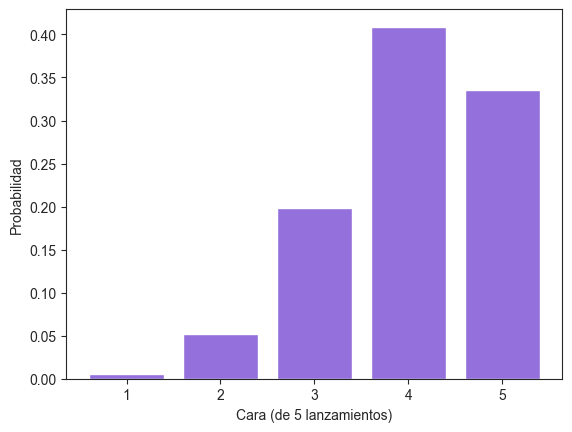

In [47]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Cara (de 5 lanzamientos)')
_ = plt.ylabel('Probabilidad')

Técnicamente, las distribuciones binomiales se crean muestreando $n>1$ «ensayos Bernoulli». La distribución **Bernoulli** es equivalente a la distribución binomial cuando $n=1$:

In [48]:
np.random.binomial(1, 0.5)

0

### Distribución multinomial

Es una generalization de la distribución binomial de variable discreta a más de dos posibles salidas (por ejemplo el lanzamiento de un dado):

In [49]:
n = 1000

In [50]:
rolls = np.random.multinomial(n, [1/6.]*6)
rolls

array([150, 156, 156, 178, 152, 208])

In [51]:
event_proba = rolls/n

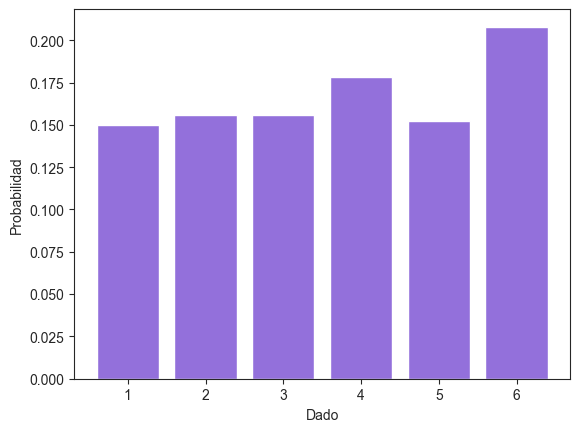

In [52]:
plt.bar(range(1, 7), event_proba, color='mediumpurple')
plt.xlabel('Dado')
_ = plt.ylabel('Probabilidad')

Como en el caso binomial, las distribuciones multinomiales se crean muestreando $n>1$ distribuciones multinoulli, donde la distribución multinoulli es equivalente a la distribución multinomial cuando $n=1$:

In [53]:
np.random.multinomial(1, [1/6.]*6)

array([0, 1, 0, 0, 0, 0])

Dado que las distribuciones multinomiales pueden representar cualquier variable categórica (por ejemplo, hamburguesa, pizza; 52 cartas; equipos de fútbol, etc.), no sólo valores enteros, no siempre podemos calcular un valor esperado.

### Distribución de Poisson

**Poisson** es otra distribución ampliamente utilizada para variables aleatorias discretas. Viene dada por

$$p(r, \mu) = \frac{\mu^{r}e^{-r}}{r!}$$

En dónde $r$ es un entero ($\geq 0$) y $\mu$ es un número real positivo. La Distribución Poisson describe la probabilidad de encontrar exactamente $r$ eventos en un lapso de tiempo si los acontecimientos se producen de forma independiente a una velocidad constante $\mu$. Es una de las distribuciones más utilizadas en estadística con varias aplicaciones; como por ejemplo describir el número de fallos en un lote de materiales o la cantidad de llegadas por hora a un centro de servicios.

En Python la podemos generar fácilmente con la ayuda de scipy.stats, paquete que utilizaremos para representar a todas las restantes distribuciones a lo largo de todo el artículo.

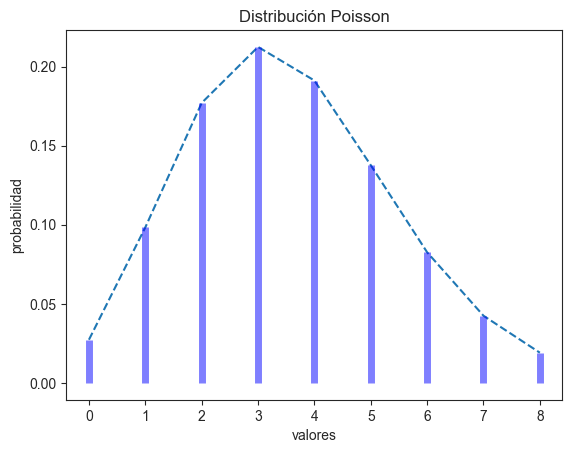

In [54]:
mu =  3.6 # parametro de forma
poisson = stats.poisson(mu) # Distribución
x = np.arange(poisson.ppf(0.01),
              poisson.ppf(0.99))
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución de Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

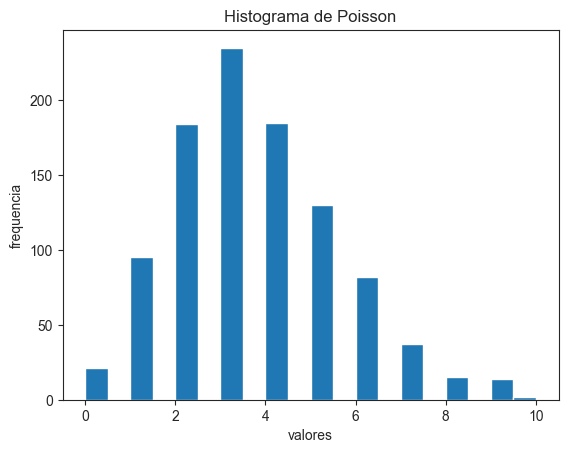

In [82]:
aleatorios = poisson.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma de Poisson')
plt.show()

## Distribución contínuas

Ahora que ya conocemos las principales distribuciones discretas, podemos pasar a describir a las distribuciones continuas; en ellas a diferencia de lo que veíamos antes, la variable puede tomar cualquier valor dentro de un intervalo específico.


### Distribución normal

Carl Friedrich Gauss (matemático y científico alemán de principios del siglo XIX) da nombre a más de cien conceptos de matemáticas, física y astronomía. Uno de esos conceptos es la distribución de Gauss, también conocida como «curva de campana» (aunque varias distribuciones tienen forma de campana) o **distribución normal**. Esta distribución es aplicable a un amplio rango de problemas, lo que la convierte en la distribución más utilizada en estadística; está dada por la formula:

$$p(x; \mu, \sigma^{2}) = \frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-1}{2}(\frac{x-\mu}{\sigma})^2}$$

En dónde $\mu$ es la media aritmética y $\sigma^2$ es la desviacion estándar. Algunos ejemplos de variables asociadas a fenómenos naturales que siguen el modelo de la Distribución Normal son: características morfológicas de individuos, como la estatura; características sociológicas, como el consumo de cierto producto por un mismo grupo de individuos; características psicológicas, como el cociente intelectual; nivel de ruido en telecomunicaciones; errores cometidos al medir ciertas magnitudes; etc.

La distribución normal tipificada tiene una media de cero y una desviación estándar de uno y se le denomina **distribución estandard nornal**. A la distribucion normal se le denota por $\mathcal{N}(\mu, \sigma^2)$, mientras que la distribución normal estandard es $\mathcal{N}(0, 1)$.

Las distribuciones normales son, con diferencia, las más comunes en estadística y aprendizaje automático. Suelen ser la opción por defecto, sobre todo si se dispone de información limitada sobre el proceso aleatorio que se está modelando, porque:

1. Las distribuciones normales asumen la mayor incertidumbre posible sobre la variable aleatoria que representan (en relación con cualquier otra distribución de varianza equivalente).

2. Tanto los procesos aleatorios simples como los muy complejos se distribuyen normalmente, en todas las condiciones habituales. Dado que muestreamos datos para modelos estadísticos y de aprendizaje automático por igual, este llamado **teorema del límite central** (que se trata a continuación) es un concepto de importancia crítica.



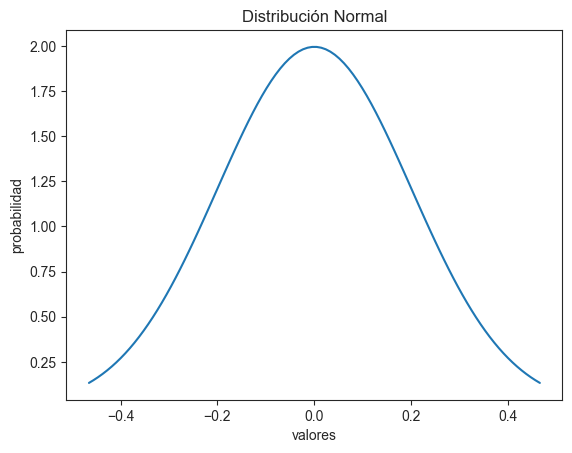

In [83]:
mu, sigma = 0, 0.2 # media y desvio estandar
normal = stats.norm(mu, sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

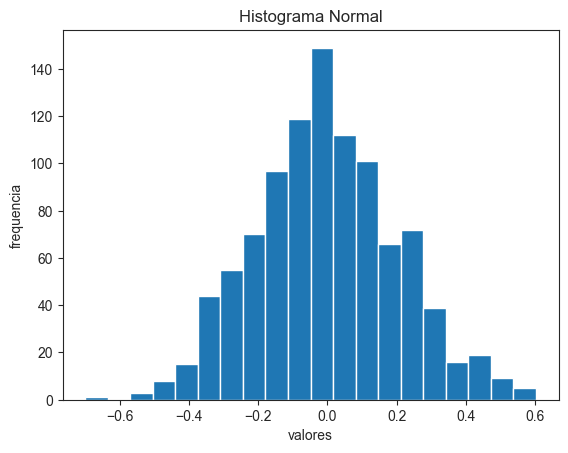

In [84]:
# histograma
aleatorios = normal.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Normal')
plt.show()

### Distribución uniforme

La Distribución Uniforme es un caso muy simple expresada por la función:

$$f(x; a, b) = \frac{1}{b-a} \text{   con   }  a\leq x \leq b$$

Su función de distribución esta entonces dada por:
$$p(x; a,b) = \left\{ \begin{array}{lr} 0 & \text{  si  } x \leq a \\ \frac{x-a}{b-a} & \text{  si  } a \leq x \leq b \\  1 & \text{  si  } b \leq x \end{array} \right. $$


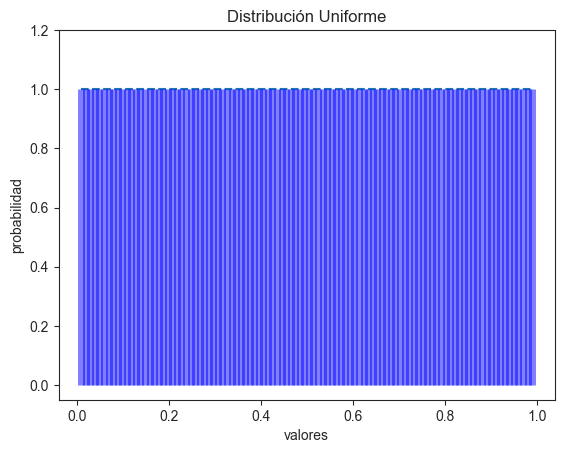

In [85]:
uniforme = stats.uniform()
x = np.linspace(uniforme.ppf(0.01),
                uniforme.ppf(0.99), 100)
fp = uniforme.pdf(x) # Función de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fp, '--')
ax.vlines(x, 0, fp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8, 1., 1.2])
plt.title('Distribución Uniforme')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

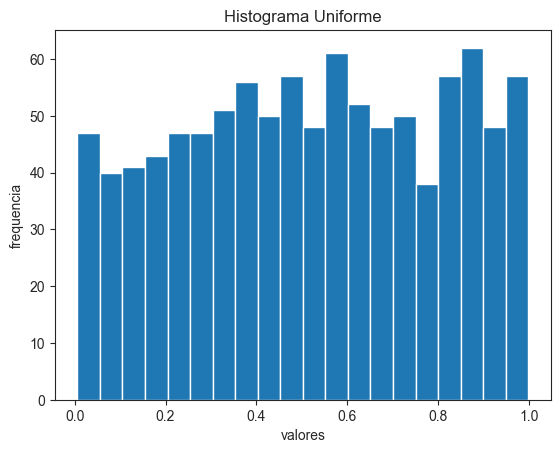

In [86]:
# histograma
aleatorios = uniforme.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Uniforme')
plt.show()

### Distribución de Log-normal

La Distribución Log-normal esta dada por la formula:

$$p(x; \mu, \sigma) = \frac{1}{x \sigma \sqrt{2\pi}}e^{\frac{-1}{2}(\frac{\ln x-\mu}{\sigma})^2}$$

En dónde la variable $x > 0$ y los parámetros $\mu$ y $\sigma$ son todos números reales. La Distribución Log-normal es aplicable a variables aleatorias que están limitadas por cero, pero tienen pocos valores grandes. Es una distribución con asimetría positiva. Algunos de los ejemplos en que la solemos encontrar son: el peso de los adultos, la concentración de los minerales en depósitos, duración de licencia por enfermedad, distribución de riqueza o tiempos muertos de maquinarias, entre otros.

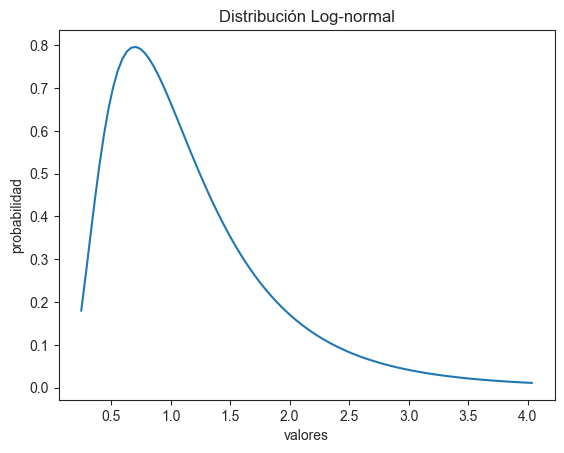

In [87]:
sigma = 0.6 # parametro
lognormal = stats.lognorm(sigma)
x = np.linspace(lognormal.ppf(0.01),
                lognormal.ppf(0.99), 100)
fp = lognormal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Log-normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

### Distribución exponencial

La Distribución Exponencial esta dada por la formula:

$$p(x; \alpha) = \frac{1}{\alpha}e^{\frac{-x}{\alpha}}$$

En dónde tanto la variable $x$ como el parámetro $\alpha$ son números reales positivos. La Distribución Exponencial tiene bastantes aplicaciones, tales como la desintegración de un átomo radioactivo o el tiempo entre eventos en un proceso de Poisson donde los acontecimientos suceden a una velocidad constante.


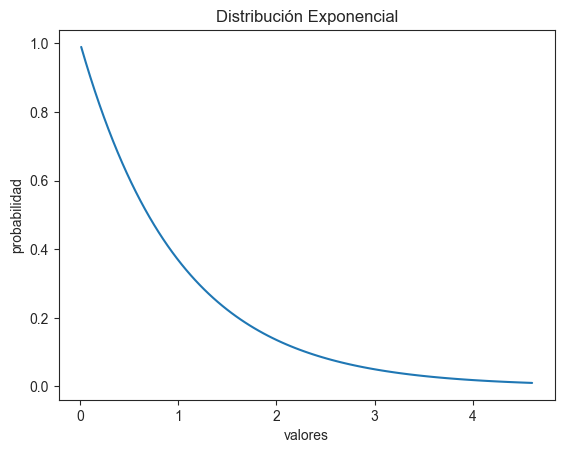

In [88]:
exponencial = stats.expon()
x = np.linspace(exponencial.ppf(0.01),
                exponencial.ppf(0.99), 100)
fp = exponencial.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Exponencial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

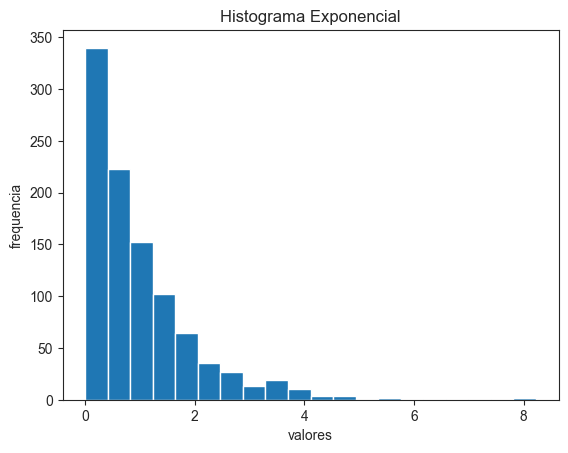

In [89]:
# histograma
aleatorios = exponencial.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Exponencial')
plt.show()

### Distribución Gamma

La Distribución Gamma esta dada por la formula:

$$p(x; a, b) = \frac{a(ax)^{b-1}e^{-ax}}{\Gamma(b)}$$

En dónde los parámetros $a$ y $b$ y la variable $x$ son números reales positivos y $\Gamma$ es la función gamma. La Distribución Gamma comienza en el origen de coordenadas y tiene una forma bastante flexible. Otras distribuciones son casos especiales de ella.

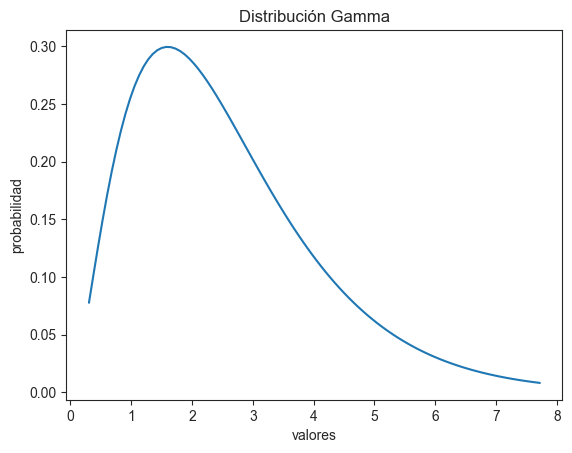

In [90]:
a = 2.6 # parametro de forma.
gamma = stats.gamma(a)
x = np.linspace(gamma.ppf(0.01),
                gamma.ppf(0.99), 100)
fp = gamma.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Gamma')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

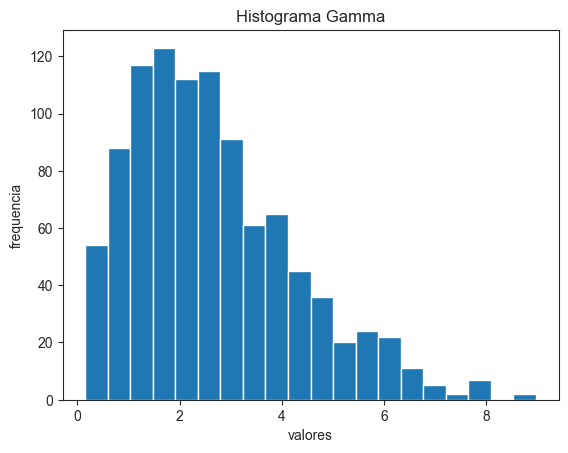

In [91]:
# histograma
aleatorios = gamma.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Gamma')
plt.show()

### Distribución Beta

La Distribución Gamma esta dada por la formula:

$$p(x; p, q) = \frac{1}{B(p,q)}x^{p-1}(1-x)^{q-1}$$

En dónde los parámetros $p$ y $q$ son números reales positivos, la variable $x$ satisface la condición $0 \leq x\leq 1$ y $B(p,q)$ es la función beta. Las aplicaciones de la Distribución Beta incluyen el modelado de variables aleatorias que tienen un rango finito de $a$ hasta $b$. Un ejemplo de ello es la distribución de los tiempos de actividad en las redes de proyectos. La Distribución Beta se utiliza también con frecuencia como una probabilidad a priori para proporciones binomiales en el análisis bayesiano.

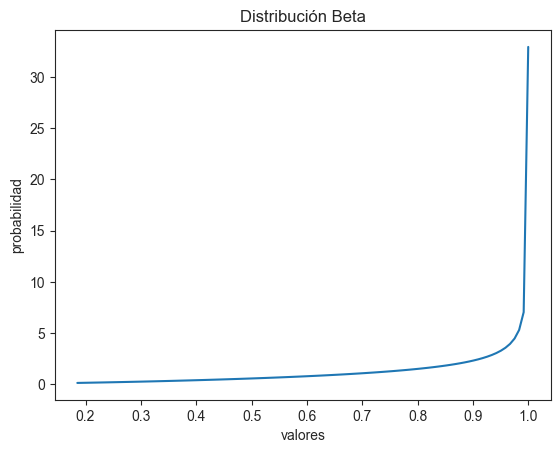

In [92]:
# Graficando Beta
a, b = 2.3, 0.6 # parametros de forma.
beta = stats.beta(a, b)
x = np.linspace(beta.ppf(0.01),
                beta.ppf(0.99), 100)
fp = beta.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Beta')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

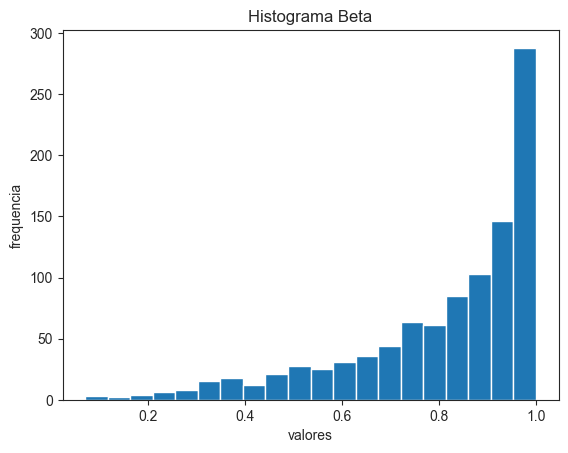

In [93]:
# histograma
aleatorios = beta.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Beta')
plt.show()

### Distribución Chi cuadrado

La Distribución Chi cuadrado esta dada por la función:

$$p(x; n) = \frac{(\frac{x}{2})^{\frac{n}{2}-1}e^{\frac{-x}{2}}}{2\Gamma(\frac{n}{2})}$$

En dónde la variable $x \geq 0$ y el parámetro $n$, el número de grados de libertad, es un número entero positivo. Una importante aplicación de la Distribución Chi cuadrado es que cuando un conjunto de datos es representado por un modelo teórico, esta distribución puede ser utilizada para controlar cuan bien se ajustan los valores predichos por el modelo, y los datos realmente observados.

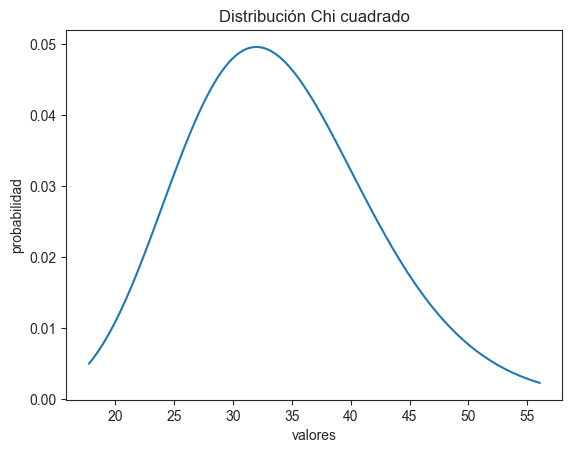

In [94]:
# Graficando Chi cuadrado
df = 34 # parametro de forma.
chi2 = stats.chi2(df)
x = np.linspace(chi2.ppf(0.01),
                chi2.ppf(0.99), 100)
fp = chi2.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Chi cuadrado')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

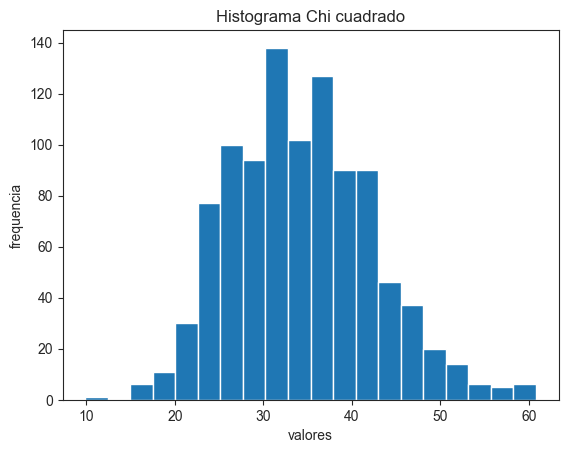

In [95]:
# histograma
aleatorios = chi2.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Chi cuadrado')
plt.show()

### Distribución T-student

La Distribución t de Student esta dada por la función:

$$p(t; n) = \frac{\Gamma(\frac{n+1}{2}}{\sqrt{n\pi}\Gamma(\frac{n+1}{2})} (1+\frac{t^2}{2})^{(-\frac{n+1}{2})}$$

En dónde la variable $t$ es un número real y el parámetro $n$ es un número entero positivo. La Distribución t-Student es utilizada para probar si la diferencia entre las medias de dos muestras de observaciones es estadísticamente significativa. Por ejemplo, las alturas de una muestra aleatoria de los jugadores de baloncesto podría compararse con las alturas de una muestra aleatoria de jugadores de fútbol; esta distribución nos podría ayudar a determinar si un grupo es significativamente más alto que el otro.

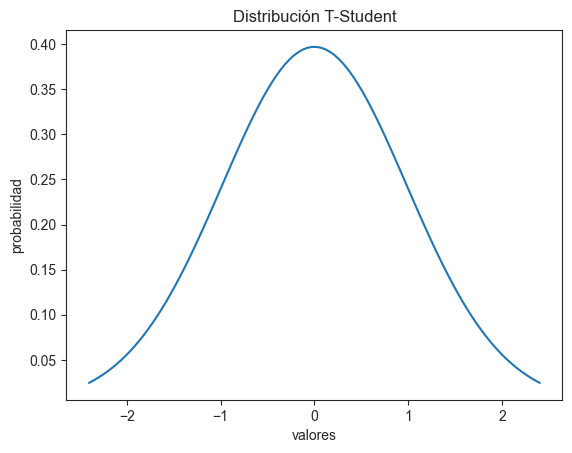

In [96]:
df = 50 # parametro de forma.
t = stats.t(df)
x = np.linspace(t.ppf(0.01),
                t.ppf(0.99), 100)
fp = t.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución T-Student')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

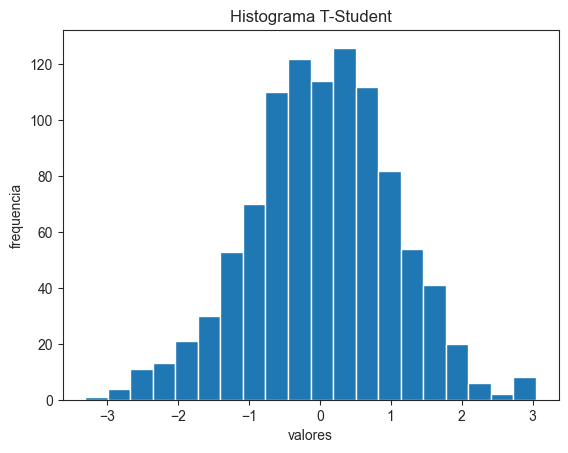

In [97]:
# histograma
aleatorios = t.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma T-Student')
plt.show()

## Distribuciones mixtas

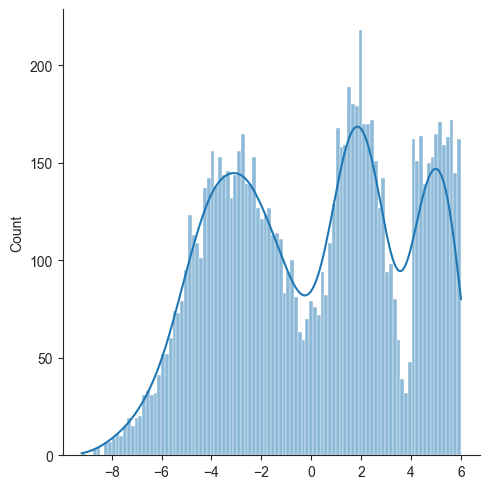

In [71]:
distributions = [
    {"type": np.random.normal, "kwargs": {"loc": -3, "scale": 2}},
    {"type": np.random.uniform, "kwargs": {"low": 4, "high": 6}},
    {"type": np.random.normal, "kwargs": {"loc": 2, "scale": 1}},
]

coefficients = np.array([0.5, 0.2, 0.3])
coefficients /= coefficients.sum()      # in case these did not add up to 1
sample_size = 10000

num_distr = len(distributions)
data = np.zeros((sample_size, num_distr))
for idx, distr in enumerate(distributions):
    data[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])

random_idx = np.random.choice(np.arange(num_distr), size=(sample_size,), p=coefficients)
sample = data[np.arange(sample_size), random_idx]
_ = sns.displot(sample, bins=100, kde=True)

### ¿Cómo elegir la distribución que mejor se ajusta a mis datos?

Ahora ya tenemos un conocimiento general de las principales distribuciones con que nos podemos encontrar; pero ¿cómo determinamos que distribución debemos utilizar?

Un modelo que podemos seguir cuando nos encontramos con datos que necesitamos ajustar a una distribución, es comenzar con los datos sin procesar y responder a cuatro preguntas básicas acerca de los mismos, que nos pueden ayudar a caracterizarlos. La primer pregunta se refiere a si los datos pueden tomar valores discretos o continuos. La segunda pregunta que nos debemos hacer, hace referencia a la simetría de los datos y si hay asimetría, en qué dirección se encuentra; en otras palabras, son los valores atípicos positivos y negativos igualmente probables o es uno más probable que el otro. La tercer pregunta abarca los límites superiores e inferiores en los datos; hay algunos datos, como los ingresos, que no pueden ser inferiores a cero, mientras que hay otros, como los márgenes de operación que no puede exceder de un valor (100%). La última pregunta se refiere a la posibilidad de observar valores extremos en la distribución; en algunos casos, los valores extremos ocurren con muy poca frecuencia, mientras que en otros, se producen con mayor frecuencia.

Con la ayuda de estas preguntas fundamentales, más el conocimiento de las distintas distribuciones deberíamos estar en condiciones de poder caracterizar cualquier conjunto de datos

## Ejercicios

1. En el lanzamiento de dos dados consideramos la variable aleatoria que asocia a cada resultado el mayor de los números obtenidos. Halla: a) La función de probabilidad asociada a dicha variable aleatoria; b) La función de distribución asociada a dicha variable aleatoria.
   
2. Hallar la media o valor esperado, varianza y desviación típica de la variable aleatoria del ejercicio anterior.
   
3. Un jugador lanza tres monedas. Recibe 100 €, si salen tres caras; 25 €, si salen 2 caras; y nada, si sale cualquier otra combinación. ¿Cuál debería ser el precio de la apuesta para que el juego fuese equitativo o justo?

4. Se supone que la probabilidad de nacer niño es del 0,50. Calcula la probabilidad de que en una familia de seis hijos sean: a) Todos varones; b) Al menos, dos varones; c) Tres varones; d) Calcula la media y la desviación típia.

5. Una prueba de inteligencia está compuesta por 10 preguntas, cada una de las cuales tiene cuatro respuestas, siendo sólo una de ellas correcta. Un alumno tiene prisa por acabar la prueba y decide contestar a lo loco, es decir, aleatoriamente. Se pide: a)	Probabilidad de acertar exactamente cuatro preguntas; b) Probabilidad de no acertar ninguna pregunta; 
c)	Probabilidad de acertar l menosa3; 
 )	Probabilidad de acertar al nos m; . e)	Probabilidad de acertar a sloo 2. u

t6. En el lanzamiento de tres dados consideramos la variable aleatoria consistente en anotar el número de múltiplos de tres que aparec Responde a las siguientes cuestiones:   a)	Halla su función de probabilidad y reprntela;    
b)	Determina su función de distribución yreséntala;   .
c)	Halla la media y la deón típia.

e7. El 30% de un determinado pueblo ve un concurso que hay en televisión. Desde el concurso se llama por teléfono a 10 personas del pueblo elegidas al azar. Calcular la probabilidad de que, entre las 10 personas, estuvieran viendo el programa: a) Más de ocho personas b) Algunas de las diez personas c) Calcular la media y desviación típica.

8. Una sucursal bancaria de un pueblo pequeño atiende, en promedio, a 6 clientes por día. Se d
    a) Definir una variable aleatoria que cuente el número de clientes por días e identificar la distribución de probabilidad que sigue esta variable alea; 
   b)  Calcular la probabilidad de que en un día dado, la sucursal atienda exactamente a 4 cli; 
  cc)  Calcular la probabilidad de que, en un día cualquiera, la sucursal atienda al menos a 6 cli; 
    d) Calcular la probabilidad de que, en un día dado, la sucursal reciba entre 6 y 8 clientes (ambos inclu; 
    e) Obtener la mediana de la var;e
   f)  Generar una muestra de 10 valores aleatorios de la distribución.

9. En unos estudios realizados sobre el peso de los estudiante de un colegio, se obtiene que el peso medio es 70 kg. y la desviación típica es 3 kg. Seleccionando un estudiante al azar y suponiendo que los pesos se distribuyen según una Normal, calc 
    a) La probabilidad de que el estudiante pese entre 60 kg. y 75 kg. (ambos inclu; 
    b) La probabilidad de que el estudiante pese más de ; 
    c) La probabilidad de que el estudiante pese 64 kg. o ; 
    d) El peso mínimo del 10% de los estudiantes que más ; 
    e) Doce pesos aleatorios que sigan dicha distribución.

10. Se ha estudiado el nivel de glucosa en sangre en ayunas en un grupo de diabéticos. Esta variable se supone que sigue una distribución Normal, con media 106 mg/100 ml y desviación típica 8 mg/100 ml.
Se  
    a) Obtener la probabilidad de que el nivel de glucosa en sangre en un diabético sea inferior a 120 mg/1; 
    b) ¿Qué porcentaje de diabéticos tienen niveles de glucosa en sangre comprendidos entre 90 y 130 mg/10; 
    c) Hallar el valor de la variable caracterizado por la propiedad de que el 25% de todos los diabéticos tiene un nivel de glucosa en ayunas inferior a dicho ; 
    d) Generar una muestra de tamaño 12 para la una distribución Normal con media igual a 5 y desviación típica iguals.
a.
